[Rough notebook link](https://colab.research.google.com/drive/1jUVlC3Nl-t0eW2V4XIgZ1JiU_j2PZTqT#scrollTo=nA0GgdD-48gF)

In [1]:
import pandas as pd
import numpy as np

# Extracting data

In [2]:
data = pd.read_excel("/content/drive/MyDrive/ColabNotebooks/ML : Cement Strength Prediction/cement_strength_data.xlsx")
display(data.head(5))

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29


# EDA on data

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cement        1030 non-null   float64
 1   slag          1030 non-null   float64
 2   ash           1030 non-null   float64
 3   water         1030 non-null   float64
 4   superplastic  1030 non-null   float64
 5   coarseagg     1030 non-null   float64
 6   fineagg       1030 non-null   float64
 7   age           1030 non-null   int64  
 8   strength      1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


In [4]:
# Checking NULL values
data.isnull().sum()

cement          0
slag            0
ash             0
water           0
superplastic    0
coarseagg       0
fineagg         0
age             0
strength        0
dtype: int64

In [5]:
# Output feature
data['strength'].sort_values().head(5)

230    2.33
246    3.32
407    4.57
783    4.78
375    4.83
Name: strength, dtype: float64

### Outlier detection

cement             AxesSubplot(0.125,0.125;0.0731132x0.755)
slag            AxesSubplot(0.212736,0.125;0.0731132x0.755)
ash             AxesSubplot(0.300472,0.125;0.0731132x0.755)
water           AxesSubplot(0.388208,0.125;0.0731132x0.755)
superplastic    AxesSubplot(0.475943,0.125;0.0731132x0.755)
coarseagg       AxesSubplot(0.563679,0.125;0.0731132x0.755)
fineagg         AxesSubplot(0.651415,0.125;0.0731132x0.755)
age             AxesSubplot(0.739151,0.125;0.0731132x0.755)
strength        AxesSubplot(0.826887,0.125;0.0731132x0.755)
dtype: object

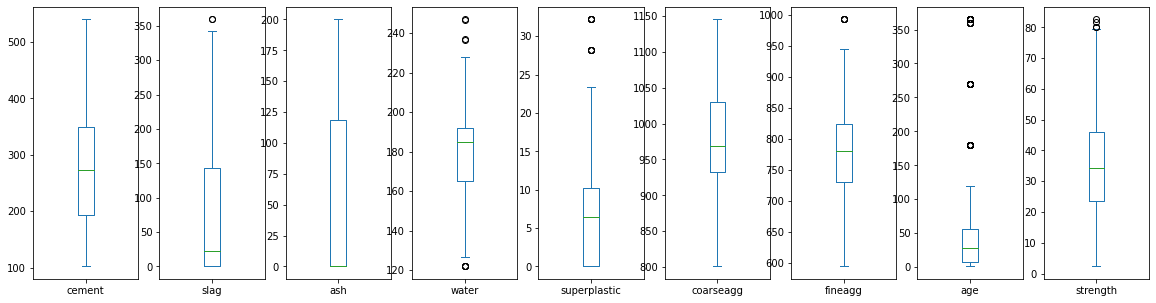

In [6]:
data.plot(kind='box', subplots=True, layout=(1,9), figsize=(20,5))

In [7]:
outlier=pd.DataFrame({})
for i in data.columns:
  q1=data[i].quantile(0.25)
  q3=data[i].quantile(0.75)
  iqr=q3-q1
  lw=q1-(1.5*iqr)
  uw=q3+(1.5*iqr)
  out=False
  if (data[i].min() < lw) or (data[i].max() > uw):
    out=True
  else:
    out=False
  outlier=outlier.append({
      'column_name':i,
      'min':data[i].min(),
      'max':data[i].max(),
      'mean':data[i].mean(),
      'std':data[i].std(),
      'lower_whisker':lw,
      'upper_whisker':uw,
      'has_outlier': 'yes' if out==True else 'no'
  }, ignore_index = True)
  
display(outlier)

,column_name,min,max,mean,std,lower_whisker,upper_whisker,has_outlier
0,cement,102.00,540.0,281.167864,104.506364,-44.0625,586.4375,no
1,slag,0.00,359.4,73.895825,86.279342,-214.4250,357.3750,yes
2,ash,0.00,200.1,54.188350,63.997004,-177.4500,295.7500,no
3,water,121.80,247.0,181.567282,21.354219,124.2500,232.6500,yes
4,superplastic,0.00,32.2,6.204660,5.973841,-15.3000,25.5000,yes
5,coarseagg,801.00,1145.0,972.918932,77.753954,785.9000,1175.5000,no
6,fineagg,594.00,992.6,773.580485,80.175980,591.3750,963.5750,yes
7,age,1.00,365.0,45.662136,63.169912,-66.5000,129.5000,yes
8,strength,2.33,82.6,35.817961,16.705742,-9.9275,79.7725,yes


So, slag, water, superplastic, fineagg, age and strength have outliers.

### Removing outlier

In [8]:
data2=data.copy()
outlier2=pd.DataFrame({})
for i in data2.columns:
  data2[i]=data2[data2[i]>(float(outlier[(outlier['column_name']==i)]['lower_whisker'].values))][i]
  data2[i]=data2[data2[i]<(float(outlier[(outlier['column_name']==i)]['upper_whisker'].values))][i]
  outlier2=outlier2.append({
      'column_name':i,
      'old min':data[i].min(),
      'new min':data2[i].min(),
      'old max':data[i].max(),
      'new max':data2[i].max()
      }, ignore_index = True)
  
display(outlier2)

,column_name,old min,new min,old max,new max
0,cement,102.00,102.00,540.0,540.0
1,slag,0.00,0.00,359.4,342.1
2,ash,0.00,0.00,200.1,200.1
3,water,121.80,126.60,247.0,228.0
4,superplastic,0.00,0.00,32.2,23.4
5,coarseagg,801.00,801.00,1145.0,1145.0
6,fineagg,594.00,594.00,992.6,945.0
7,age,1.00,1.00,365.0,120.0
8,strength,2.33,2.33,82.6,79.4


cement             AxesSubplot(0.125,0.125;0.0731132x0.755)
slag            AxesSubplot(0.212736,0.125;0.0731132x0.755)
ash             AxesSubplot(0.300472,0.125;0.0731132x0.755)
water           AxesSubplot(0.388208,0.125;0.0731132x0.755)
superplastic    AxesSubplot(0.475943,0.125;0.0731132x0.755)
coarseagg       AxesSubplot(0.563679,0.125;0.0731132x0.755)
fineagg         AxesSubplot(0.651415,0.125;0.0731132x0.755)
age             AxesSubplot(0.739151,0.125;0.0731132x0.755)
strength        AxesSubplot(0.826887,0.125;0.0731132x0.755)
dtype: object

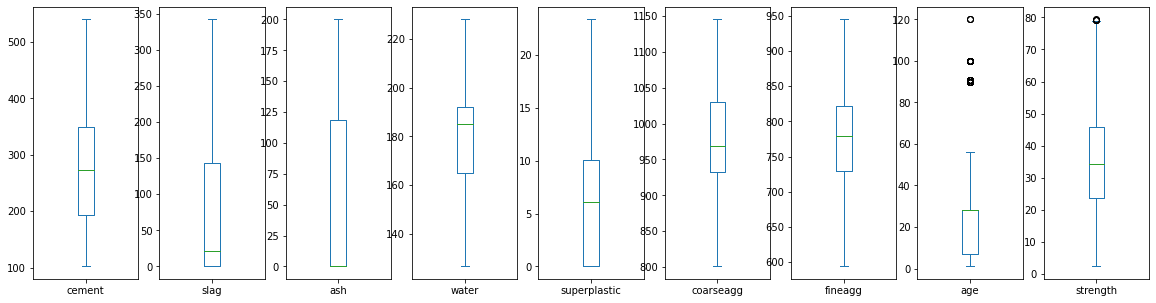

In [9]:
data2.plot(kind='box', subplots=True, layout=(1,9), figsize=(20,5))

Note: Though age and strength is showing outliers as they are calculated with new values of data. Original outliers have been removed.

### Checking NULL values

In [10]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cement        1030 non-null   float64
 1   slag          1028 non-null   float64
 2   ash           1030 non-null   float64
 3   water         1021 non-null   float64
 4   superplastic  1020 non-null   float64
 5   coarseagg     1030 non-null   float64
 6   fineagg       1025 non-null   float64
 7   age           971 non-null    float64
 8   strength      1026 non-null   float64
dtypes: float64(9)
memory usage: 72.5 KB


In [11]:
data2.isnull().sum()

cement           0
slag             2
ash              0
water            9
superplastic    10
coarseagg        0
fineagg          5
age             59
strength         4
dtype: int64

In [12]:
# Earlier for slag the value was 359.4, which is an outlier
data[(data['water']==185.7) & (data['cement']==239.6)]

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
918,239.6,359.4,0.0,185.7,0.0,941.6,664.3,28,39.44
990,239.6,359.4,0.0,185.7,0.0,941.6,664.3,7,25.42


In [13]:
# The value of 359.4 has been removed from slag, now it has NULL value
data2[data2['slag'].isnull()==True]

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
918,239.6,NaN,0.0,185.7,0.0,941.6,664.3,28.0,39.44
990,239.6,NaN,0.0,185.7,0.0,941.6,664.3,7.0,25.42


In [14]:
# Checking %age of NULLs
data2.isnull().sum()/1030*100

# So, for slag, water, superplastic, fineagg and strength we could drop the missing values
# But for age we need to impute or predict the missing values

cement          0.000000
slag            0.194175
ash             0.000000
water           0.873786
superplastic    0.970874
coarseagg       0.000000
fineagg         0.485437
age             5.728155
strength        0.388350
dtype: float64

### Removing NULL values

In [15]:
# Viewing NULL values
data2[(data2['slag'].isnull()) | (data2['water'].isnull())]

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
66,237.0,92.0,71.0,NaN,6.0,853.0,695.0,28.0,28.63
263,236.9,91.7,71.5,NaN,6.0,852.9,695.4,28.0,28.63
432,168.0,42.1,163.8,NaN,5.7,1058.7,780.1,28.0,24.24
462,168.0,42.1,163.8,NaN,5.7,1058.7,780.1,100.0,39.23
587,168.0,42.1,163.8,NaN,5.7,1058.7,780.1,3.0,7.75
740,140.0,164.0,128.0,NaN,6.0,869.0,656.0,28.0,35.23
789,168.0,42.1,163.8,NaN,5.7,1058.7,780.1,56.0,32.85
826,139.7,163.9,127.7,NaN,5.8,868.6,655.6,28.0,35.23
914,168.0,42.1,163.8,NaN,5.7,1058.7,780.1,14.0,17.82
918,239.6,NaN,0.0,185.7,0.0,941.6,664.3,28.0,39.44


In [16]:
# Removing NULL values from slag, water, superplastic, fineagg and strength
data3=data2.copy()
data3=data3.dropna(subset=['slag', 'water', 'superplastic', 'fineagg', 'strength'])

In [17]:
print(data2.shape)
print(data3.shape)

(1030, 9)
(1000, 9)


### Type 1 : Imputing NULL values

In [18]:
data4=data3.copy()   # will be used in imputation of NULL values

In [19]:
print(data4['age'].mean())
print(data4['age'].median())
print(data4['age'].mode())
# we will impute it with mode

32.376195536663126
28.0
0    28.0
dtype: float64


In [20]:
data4['age']=data4['age'].fillna(data['age'].mode()[0])

In [21]:
print(data4.isnull().sum())
print(data4.shape)

cement          0
slag            0
ash             0
water           0
superplastic    0
coarseagg       0
fineagg         0
age             0
strength        0
dtype: int64
(1000, 9)


### Type 2 : Predicting data for NULL value

In [22]:
data5=data3.copy()   # will be used in prediction of NULL values

In [23]:
print(data5.shape)
print(data5.isnull().sum())
# so, we have NULL values in 'age'

(1000, 9)
cement           0
slag             0
ash              0
water            0
superplastic     0
coarseagg        0
fineagg          0
age             59
strength         0
dtype: int64


In [24]:
data5.reset_index(inplace=True)
data5=data5.drop(['index'], axis=1)
display(data5)

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28.0,29.89
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14.0,23.51
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28.0,29.22
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28.0,45.85
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28.0,18.29
...,...,...,...,...,...,...,...,...,...
995,297.2,0.0,117.5,174.8,9.5,1022.8,753.5,3.0,21.91
996,135.0,0.0,166.0,180.0,10.0,961.0,805.0,28.0,13.29
997,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28.0,44.28
998,342.0,38.0,0.0,228.0,0.0,932.0,670.0,NaN,55.06


In [25]:
# 'age' will be considered as output feature, while rest will be considered as input feature

# Splitting input and output features
x=data5.drop(['age'], axis=1)
y=pd.DataFrame(data5['age'], columns=['age'])

# Splitting train and test
x_train=x[y['age'].isnull()==False]
y_train=y[y['age'].isnull()==False]
x_test=x[y['age'].isnull()]
y_test=y[y['age'].isnull()]

# Training Model
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x_train, y_train)
y_pred=model.predict(x_test)

y_pred=pd.DataFrame(y_pred, columns=['age'], index=y_test.index)
print(y_pred.head(5))

           age
50   52.315779
63   45.918465
91   42.621184
97   42.103392
101  79.792921


In [26]:
zz=y_train.append(y_pred)
data5['age']=zz.sort_index()
display(data5['age'])

0      28.000000
1      14.000000
2      28.000000
3      28.000000
4      28.000000
         ...    
995     3.000000
996    28.000000
997    28.000000
998    85.148671
999     7.000000
Name: age, Length: 1000, dtype: float64

In [27]:
print(data5.shape)
print(data5.isnull().sum())
# all the NULL values have been removed from 'age'

(1000, 9)
cement          0
slag            0
ash             0
water           0
superplastic    0
coarseagg       0
fineagg         0
age             0
strength        0
dtype: int64


# Saving cleaned data

In [28]:
data_final=data5
data_final.to_csv('/content/drive/MyDrive/ColabNotebooks/ML : Cement Strength Prediction/cleaned_data.csv')

Please find the R2 scores below:
* Type 1 : Imputing NULL values with mode (data4)
> R2 score = 0.91
* Type 2 : Predicting data for NULL values (data5)
> R2 score = 0.93
* So, proceeding ahead with "Type 2 i.e. Predicting data for NULL values (data5)".

# Feature scaling 

In [29]:
#from sklearn.preprocessing import StandardScaler
#scaler = StandardScaler()
#data_final=pd.DataFrame(scaler.fit_transform(data_final), columns=data_final.columns)

Please find the R2 scores below:
* Without feature scaling
> R2 score = 0.9375156625718466
* With feature scaling
> R2 score = 0.9327079062788818

So, proceeding ahead with "Without feature scaling".

# Model creation

In [30]:
!pip install lazypredict

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [31]:
# Splitting input and output features
x=data_final.drop(['strength'], axis=1)
y=pd.DataFrame(data_final['strength'], columns=['strength'])

# Splitting train and test data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=7, shuffle=True)

### Testing for best model

In [32]:
import lazypredict
from lazypredict.Supervised import LazyRegressor

model=LazyRegressor(verbose=0, ignore_warnings=False)
models, prediction = model.fit(x_train, x_test, y_train, y_test)
models.head(10)

 93%|█████████▎| 39/42 [00:27<00:02,  1.12it/s]

[18:59:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


100%|██████████| 42/42 [00:28<00:00,  1.49it/s]


,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
LGBMRegressor,0.95,0.95,3.48,0.20
HistGradientBoostingRegressor,0.95,0.95,3.49,0.76
ExtraTreesRegressor,0.94,0.94,3.82,0.26
RandomForestRegressor,0.93,0.94,3.95,0.97
BaggingRegressor,0.92,0.92,4.39,0.06
XGBRegressor,0.91,0.92,4.50,0.23
GradientBoostingRegressor,0.91,0.92,4.53,0.22
DecisionTreeRegressor,0.86,0.87,5.71,0.02
ExtraTreeRegressor,0.82,0.83,6.50,0.01


So, we are picking up RandomForestRegressor as the best model here.

In [33]:
from sklearn.ensemble import RandomForestRegressor
j=0
k=0
for i in range(50,500):
  model=RandomForestRegressor(random_state=i)
  model.fit(x_train, y_train)
  y_pred=model.predict(x_test)

  from sklearn import metrics
  #print(i, metrics.r2_score(y_test, y_pred))
  if (metrics.r2_score(y_test, y_pred) > k):
    k=metrics.r2_score(y_test, y_pred)
    j=i
print(j, k)

69 0.9396633703236308


So, the best value for random_state is 69

In [34]:
from sklearn.ensemble import RandomForestRegressor
j=0
k=0
for i in range(1,200):
  model=RandomForestRegressor(random_state=69, max_depth=i)
  model.fit(x_train, y_train)
  y_pred=model.predict(x_test)

  from sklearn import metrics
  #print(i, metrics.r2_score(y_test, y_pred))
  if (metrics.r2_score(y_test, y_pred) > k):
    k=metrics.r2_score(y_test, y_pred)
    j=i
print(j, k)

24 0.9396745922728867


So, the best value of max_depth is 24

In [35]:
from sklearn.ensemble import RandomForestRegressor
j=0
k=0
for i in range(1,9):
  model=RandomForestRegressor(random_state=69, max_depth=24, max_features=i)
  model.fit(x_train, y_train)
  y_pred=model.predict(x_test)

  from sklearn import metrics
  #print(i, metrics.r2_score(y_test, y_pred))
  if (metrics.r2_score(y_test, y_pred) > k):
    k=metrics.r2_score(y_test, y_pred)
    j=i
print(j, k)

8 0.9396745922728867


So, the best value of max_features is 8

In [36]:
from sklearn.ensemble import RandomForestRegressor
j=0
k=0
for i in range(1,20):
  model=RandomForestRegressor(random_state=69, max_depth=24, max_features=8, min_samples_leaf=i)
  model.fit(x_train, y_train)
  y_pred=model.predict(x_test)

  from sklearn import metrics
  #print(i, metrics.r2_score(y_test, y_pred))
  if (metrics.r2_score(y_test, y_pred) > k):
    k=metrics.r2_score(y_test, y_pred)
    j=i
print(j, k)

1 0.9396745922728867


So, the best value of min_samples_leaf is 1

In [37]:
from sklearn.ensemble import RandomForestRegressor
j=0
k=0
for i in range(1,200):
  model=RandomForestRegressor(random_state=69, max_depth=24, max_features=8, min_samples_leaf=1, n_estimators=i)
  model.fit(x_train, y_train)
  y_pred=model.predict(x_test)

  from sklearn import metrics
  #print(i, metrics.r2_score(y_test, y_pred))
  if (metrics.r2_score(y_test, y_pred) > k):
    k=metrics.r2_score(y_test, y_pred)
    j=i
print(j, k)

38 0.9404434299072564


So, the best value of n_estimators is 38

In [38]:
model=RandomForestRegressor(
    random_state=69, 
    n_estimators=38,
    min_samples_leaf=1,
    max_features=8,
    max_depth=24,
    bootstrap=True)
model.fit(x_train, y_train)
y_pred=model.predict(x_test)
print(metrics.r2_score(y_test, y_pred))

0.9404434299072564


### Hyper-parameter Tuning

In [39]:
parameter = {
    'bootstrap': [True],
    'max_depth': np.arange(20,30),
    'max_features': [5,6,7,8],
    'min_samples_leaf': np.arange(1,7),
    'n_estimators': np.arange(30,40),
    'random_state': [69]
}
model = RandomForestRegressor()

#from sklearn.model_selection import GridSearchCV
#model2=GridSearchCV(model, param_grid=parameter, cv=5, scoring='r2')

from sklearn.model_selection import RandomizedSearchCV
model2=RandomizedSearchCV(model, param_distributions=parameter, cv=5, scoring='r2')

model2.fit(x_train, y_train)
display(model2.best_params_)

{'random_state': 69,
 'n_estimators': 32,
 'min_samples_leaf': 1,
 'max_features': 5,
 'max_depth': 26,
 'bootstrap': True}

In [40]:
model=RandomForestRegressor(
    random_state=69, 
    n_estimators=36,
    min_samples_leaf=1,
    max_features=6,
    max_depth=22,
    bootstrap=True)
model.fit(x_train, y_train)
y_pred=model.predict(x_test)
print(metrics.r2_score(y_test, y_pred))

0.9377838220084617


We are seeing that with below custom paramters RandomForestregressor is giving best results:
* random_state=69
* max_depth=24
* max_features=8
* min_samples_leaf=1
* n_estimators=38

### R2_score with Custom parameters = 0.9404434299072564
### R2_score with Hyper-paramter Tuning = 0.9377838220084617

So, moving ahead with RandomForestRegressor with Custom paramters

# Final Model creation

In [41]:
# Splitting input and output features
x=data_final.drop(['strength'], axis=1)
y=pd.DataFrame(data_final['strength'], columns=['strength'])

# Model creation
from sklearn.ensemble import RandomForestRegressor
model=RandomForestRegressor(
    random_state=69, 
    n_estimators=38,
    min_samples_leaf=1,
    max_features=8,
    max_depth=24,
    bootstrap=True)

# Training model using complete input and output features
model.fit(x,y)

print('R2_score of trained model =', model.score(x,y))

R2_score of trained model = 0.9853928104841168


# Predict the cement's strength for any new value

In [42]:
input_data1=np.array([491.00, 26.00, 123.00, 210.00, 3.90, 882.00, 699.00, 56.00]).reshape(1,8)
input_data=pd.DataFrame(input_data1, columns=x_train.columns)
model.predict(input_data)[0]

58.9644736842105

# Saving model

In [43]:
import pickle
pickle.dump(model, open('/content/drive/MyDrive/ColabNotebooks/ML : Cement Strength Prediction/model_cement_strength_prediction.pkl', 'wb'))